In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import date
import statistics as stats

%matplotlib inline



In [2]:
books=pd.read_csv('all_books.csv')




In [3]:
books.head()

,url,book_pages,num_of_rating,num_of_review,genre,publish,author,title,rating,award,isbn,book_id
0,https://www.goodreads.com/book/show/61316653-e...,"780 pages, Hardcover",16,3,non-fiction,"First published January 1, 1933",Petrona C. de Gandulfo,El libro de Dona Petrona,4.13,[0],['NA'],61316653
1,https://www.goodreads.com/book/show/129603.You...,"253 pages, Unknown Binding",74,2,Nonfiction,"First published January 1, 1984",Louise L. Hay,You Can Heal Your Life,4.16,[0],['9788176210775'],129603
2,https://www.goodreads.com/book/show/51091831,"400 pages, Hardcover",8,2,art-history,"Published January 1, 2019",Михаил Майзульс,Мышеловка святого Иосифа. Как средневековый об...,4.63,[0],['NA'],51091831
3,https://www.goodreads.com/book/show/15818223-f...,"304 pages, Hardcover",1,126,Food,"First published March 19, 2013",Daphne Miller,Farmacology: What Innovative Family Farming Ca...,4.27,[0],['9780062103147'],15818223
4,https://www.goodreads.com/book/show/5949533-ex...,"190 pages, Paperback",16,2,Sword and Sorcery,"First published September 1, 1970",Richard Meade,Exile's Quest,3.06,[0],['9780451043481'],5949533


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274233 entries, 0 to 274232
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   url            274233 non-null  object 
 1   book_pages     274233 non-null  object 
 2   num_of_rating  274233 non-null  int64  
 3   num_of_review  274233 non-null  int64  
 4   genre          274233 non-null  object 
 5   publish        274233 non-null  object 
 6   author         274231 non-null  object 
 7   title          274233 non-null  object 
 8   rating         274233 non-null  float64
 9   award          274233 non-null  object 
 10  isbn           274233 non-null  object 
 11  book_id        274233 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 25.1+ MB


# Data Preprocessing

## Check and Replace Missing Values

In [5]:
books.isnull().sum()

url              0
book_pages       0
num_of_rating    0
num_of_review    0
genre            0
publish          0
author           2
title            0
rating           0
award            0
isbn             0
book_id          0
dtype: int64

In [6]:
print(books[books["author"].isnull()]) #author=Raquel Valldeperas

                                                      url  \
103210  https://www.goodreads.com/book/show/17931254-t...   
121240  https://www.goodreads.com/book/show/17405888-t...   

                  book_pages  num_of_rating  num_of_review    genre  \
103210  217 pages, Paperback             74             31  Romance   
121240  238 pages, Paperback            285             62  Romance   

                                   publish author     title  rating award  \
103210  First published September 12, 2013    NaN  Tailspin    3.78   [0]   
121240   First published February 20, 2013    NaN     Toxic    3.95   [0]   

                     isbn   book_id  
103210             ['NA']  17931254  
121240  ['9781482382945']  17405888  


In [7]:
books.fillna("Raquel Valldeperas")

,url,book_pages,num_of_rating,num_of_review,genre,publish,author,title,rating,award,isbn,book_id
0,https://www.goodreads.com/book/show/61316653-e...,"780 pages, Hardcover",16,3,non-fiction,"First published January 1, 1933",Petrona C. de Gandulfo,El libro de Dona Petrona,4.13,[0],['NA'],61316653
1,https://www.goodreads.com/book/show/129603.You...,"253 pages, Unknown Binding",74,2,Nonfiction,"First published January 1, 1984",Louise L. Hay,You Can Heal Your Life,4.16,[0],['9788176210775'],129603
2,https://www.goodreads.com/book/show/51091831,"400 pages, Hardcover",8,2,art-history,"Published January 1, 2019",Михаил Майзульс,Мышеловка святого Иосифа. Как средневековый об...,4.63,[0],['NA'],51091831
3,https://www.goodreads.com/book/show/15818223-f...,"304 pages, Hardcover",1,126,Food,"First published March 19, 2013",Daphne Miller,Farmacology: What Innovative Family Farming Ca...,4.27,[0],['9780062103147'],15818223
4,https://www.goodreads.com/book/show/5949533-ex...,"190 pages, Paperback",16,2,Sword and Sorcery,"First published September 1, 1970",Richard Meade,Exile's Quest,3.06,[0],['9780451043481'],5949533
...,...,...,...,...,...,...,...,...,...,...,...,...
274228,https://www.goodreads.com/book/show/7673073-th...,"754 pages, Kindle Edition",314,13,Classics,"First published April 15, 1943",Ayn Rand,The Fountainhead,3.88,[0],['NA'],7673073
274229,https://www.goodreads.com/book/show/3228451-ci...,"310 pages, Paperback",138,13,Fiction,"First published May 15, 2008",David Benioff,City of Thieves,4.28,[1],['9780340923153'],3228451
274230,https://www.goodreads.com/book/show/49398068-a...,Audiobook,284,20,New Adult,"First published October 21, 2014",Anna Todd,After,3.71,[0],['NA'],49398068
274231,https://www.goodreads.com/book/show/25109681-f...,"429 pages, Paperback",144,7,Fiction,"First published January 1, 1874",Thomas Hardy,Far from the Madding Crowd,3.96,[0],['9780008127701'],25109681


## Reformat Columns

### Publish Year

In [8]:
books[["publish date","publish year"]]=books["publish"].str.split(", ", expand=True)

### Awards

In [9]:
awards= [int(books["award"][i][1]) for i in range(len(books["award"]))]
awards=pd.DataFrame(awards, columns=["awards"])

### Page Count and Book Format 

In [10]:
splitr=[]
for i in books["book_pages"]:
    splited=i.split(", ")
    splitr.append(splited)
    
for i in range(len(splitr)):
    splitz=splitr[i]
    if len(splitz)==1:
        splitz.append(splitz[-1])

In [11]:
pages=[i[0] for i in splitr]
format=[i[1] for i in splitr]

In [12]:
page_count=[]
for i in pages:
    if " pages" in i:
        newi=i.replace(" pages", "")
        int(newi)
        page_count.append(newi)
    else:
        page_count.append(i)

In [13]:
fdf=pd.DataFrame({"page_count": page_count, "format": format})

In [14]:
books=pd.concat([books, fdf, awards], axis=1)

In [15]:
books=books.drop(columns=["book_pages", "publish date", "publish", "award"], axis=0)

In [16]:
books=books[["book_id","title", "author", "publish year", "genre", "page_count", "format", "rating","awards","num_of_rating", "num_of_review", "isbn","url"]]

In [17]:
books

,book_id,title,author,publish year,genre,page_count,format,rating,awards,num_of_rating,num_of_review,isbn,url
0,61316653,El libro de Dona Petrona,Petrona C. de Gandulfo,1933,non-fiction,780,Hardcover,4.13,0,16,3,['NA'],https://www.goodreads.com/book/show/61316653-e...
1,129603,You Can Heal Your Life,Louise L. Hay,1984,Nonfiction,253,Unknown Binding,4.16,0,74,2,['9788176210775'],https://www.goodreads.com/book/show/129603.You...
2,51091831,Мышеловка святого Иосифа. Как средневековый об...,Михаил Майзульс,2019,art-history,400,Hardcover,4.63,0,8,2,['NA'],https://www.goodreads.com/book/show/51091831
3,15818223,Farmacology: What Innovative Family Farming Ca...,Daphne Miller,2013,Food,304,Hardcover,4.27,0,1,126,['9780062103147'],https://www.goodreads.com/book/show/15818223-f...
4,5949533,Exile's Quest,Richard Meade,1970,Sword and Sorcery,190,Paperback,3.06,0,16,2,['9780451043481'],https://www.goodreads.com/book/show/5949533-ex...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274228,7673073,The Fountainhead,Ayn Rand,1943,Classics,754,Kindle Edition,3.88,0,314,13,['NA'],https://www.goodreads.com/book/show/7673073-th...
274229,3228451,City of Thieves,David Benioff,2008,Fiction,310,Paperback,4.28,1,138,13,['9780340923153'],https://www.goodreads.com/book/show/3228451-ci...
274230,49398068,After,Anna Todd,2014,New Adult,Audiobook,Audiobook,3.71,0,284,20,['NA'],https://www.goodreads.com/book/show/49398068-a...
274231,25109681,Far from the Madding Crowd,Thomas Hardy,1874,Fiction,429,Paperback,3.96,0,144,7,['9780008127701'],https://www.goodreads.com/book/show/25109681-f...


## Remove Duplicates

Prioritise the duplicates that have the desired print format

In [18]:
desired_print_formats = ['Hardcover', "Kindle Edition", "ebook", "Paperback", "paperback", "Library Binding"]
# Remove rows with duplicate book titles while keeping the titles that have one of the desired print formats
books['keep_row'] = books['format'].isin(desired_print_formats)
books.sort_values(by=['keep_row', 'title'], ascending=[False, True], inplace=True)
books.drop_duplicates(subset='title', keep='first', inplace=True)
books.drop('keep_row', axis=1, inplace=True)
books.reset_index()

,index,book_id,title,author,publish year,genre,page_count,format,rating,awards,num_of_rating,num_of_review,isbn,url
0,254160,368731,"""A Problem from Hell"": America and the Age of ...",Samantha Power,2002,History,620,Paperback,4.25,1,9,626,['9780060541644'],https://www.goodreads.com/book/show/368731._A_...
1,183963,26037620,"""A"" is for Actress",Rebecca Cantrell,2015,Cozy Mystery,349,Kindle Edition,3.83,0,1,120,['NA'],https://www.goodreads.com/book/show/26037620-a...
2,78584,17238487,"""All You Zombies...""",Robert A. Heinlein,1959,Short Stories,19,Kindle Edition,4.08,1,6,643,['NA'],https://www.goodreads.com/book/show/17238487-a...
3,2736,921126,"""Anna Karenina"" in Our Time: Seeing More Wisely",Gary Saul Morson,2007,Literary Criticism,288,Hardcover,4.35,0,89,12,['9780300100709'],https://www.goodreads.com/book/show/921126._An...
4,101665,27776033,"""B"" is for Bad Girls",Rebecca Cantrell,2015,Fiction,240,Kindle Edition,4.16,0,383,31,['NA'],https://www.goodreads.com/book/show/27776033-b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207857,233,33119064,이해불능 [Out of Control / Never Understand],Bbong,2013,Manhwa,Webtoon,Webtoon,4.26,0,1,168,['NA'],https://www.goodreads.com/book/show/33119064-o...
207858,253864,57300687,재혼 황후 3 [Jaehon Hwangho 3],Alphatart,2021,Fantasy,288,288 pages,4.48,0,852,36,['9791190153652'],https://www.goodreads.com/book/show/57300687-3...
207859,141443,57300792,재혼 황후 4 [Jaehon Hwangho 4],Alphatart,2021,Fantasy,256,256 pages,4.48,0,803,35,['9791167790101'],https://www.goodreads.com/book/show/57300792-4...
207860,136233,52703142,"황자, 네 무엇이 되고 싶으냐? 1 [As You Wish, Prince 1]",MOKGAMGI,2018,Manga,Manhwa,Manhwa,4.10,0,1,107,['NA'],https://www.goodreads.com/book/show/52703142-1...


# Data Analysis

## Most Prolific Authors

In [19]:
authorbookcount={}
for i in books["author"]:
    if i in authorbookcount:
        authorbookcount[i]+=1
    else:
        authorbookcount[i]=1

In [20]:
authors,bookcount=zip(*authorbookcount.items())

In [21]:
authorcount=pd.DataFrame({"Authors": authors, "Number of Books": bookcount})

In [22]:
authorcount=authorcount.sort_values(by="Number of Books", ascending=False)

In [23]:
top10authors=authorcount.iloc[0:10,:]

In [24]:
booknumber=list(top10authors["Number of Books"])

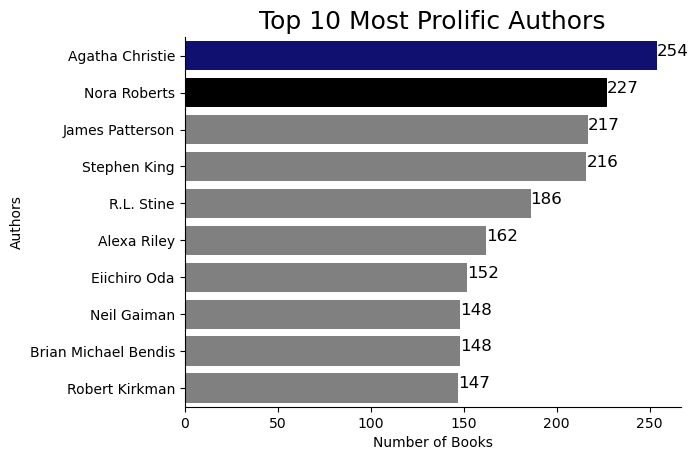

In [25]:
sns.barplot(data=top10authors, x="Number of Books", y="Authors", orient="h", palette=["navy", "black", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey"])
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.title("Top 10 Most Prolific Authors", size=18)
sns.despine()

for i in range(len(booknumber)):
    plt.text(x=booknumber[i], y=i, s=booknumber[i], 
                 color='black', fontsize=12)
plt.show()

## Most Skilled Authors in a Given Genre

In [26]:
genres=books["genre"].value_counts()

In [27]:
topgenres=pd.DataFrame(genres)

In [28]:
topgenres.iloc[0:10,:]

,genre
Fiction,20536
Romance,16521
Nonfiction,12949
Contemporary,10013
Fantasy,7495
Young Adult,6533
Contemporary Romance,5413
Mystery,4749
Historical Fiction,3901
Graphic Novels,3886


In [29]:
def author_genre_rating(genre):
    booksingenre=books[books["genre"]==genre].reset_index()

    authorgenrecount=pd.DataFrame(booksingenre["author"].value_counts())
    authorgenrecount=authorgenrecount.reset_index()
    authorgenrecount=authorgenrecount.rename(columns={"index": "author", "author": "number of books in genre"})

    authorgenrerating=booksingenre.groupby("author").mean()

    mergeddf=pd.merge(authorgenrerating, authorgenrecount, on="author")

    sortedauthors=mergeddf.sort_values(by="rating",ascending=False)
    sortedauthors=sortedauthors[sortedauthors["number of books in genre"]>=3]
    topgenreauthors=sortedauthors.iloc[0:10,[0,3,7]]
    return topgenreauthors

In [30]:
author_genre_rating("Fiction")

,author,rating,number of books in genre
3857,John Williams,4.673333,3
2315,Elle Gray,4.643333,3
833,Bella Forrest,4.637143,7
5525,Matt Dinniman,4.612500,4
2034,Domagoj Kurmaić,4.577500,4
438,Andrew Peterson,4.574000,5
7366,Shirtaloon,4.557500,4
1104,Cami Checketts,4.553333,3
810,Barry J. Hutchison,4.526667,3
3726,Jessica Redland,4.526667,3


# Merging datasets

In [31]:
user= pd.read_csv('user_details.csv')

In [32]:
user.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   USERID   7501 non-null   int64  
 1   age      1922 non-null   float64
 2   gender   835 non-null    object 
 3   Country  6696 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 234.5+ KB


In [33]:
user.isnull().sum()

USERID        0
age        5579
gender     6666
Country     805
dtype: int64

In [34]:
user = user.drop(["gender", "age"], axis=1)
user.dropna()

,USERID,Country
0,145254440,SC
1,156889166,TT
2,149481549,TT
3,129561699,TT
4,139586793,GB
...,...,...
7496,58913163,CA
7497,158627189,CA
7498,82743660,GB
7499,1174001,NZ


In [35]:
shelf= pd.read_csv('bookshelves.csv')

In [36]:
shelf.rename(columns={
    "BOOKID": "book_id"
}, inplace=True)

In [37]:
merged_df = pd.merge(books, shelf, on='book_id')

In [38]:
df = pd.merge(merged_df, user, on='USERID')


In [39]:
df["USERID"].value_counts()

3948262      190
22011854     188
1222379      186
10553671     184
152576090    184
            ... 
82589695       2
160735275      2
146834516      2
160560493      2
29638067       1
Name: USERID, Length: 6666, dtype: int64

In [40]:
df = df.drop(["isbn", "url"], axis=1)

### Most popular books

In [41]:
df_books = df.groupby(['title', 'author']).agg({'num_of_rating': 'sum'})
df_books = df_books.sort_values(by='num_of_rating', ascending=False)
top_books = df_books.head(15)
top_books

,,num_of_rating
title,author,
People We Meet on Vacation,Emily Henry,277866
"Red, White & Royal Blue",Casey McQuiston,192440
Harry Potter and the Cursed Child: Parts One and Two,John Tiffany,160198
Allegiant,Veronica Roth,136498
Clockwork Angel,Cassandra Clare,132216
Hamlet,William Shakespeare,109750
The Inheritance Games,Jennifer Lynn Barnes,104720
The Secret History,Donna Tartt,96120
Tuesdays with Morrie,Mitch Albom,94839


### Most Active Users

In [42]:
df_users = df.groupby('USERID').agg({'num_of_rating': 'sum'})
df_users = df_users.sort_values(by='num_of_rating', ascending=False)
top_users = df_users.head(15)
top_users

,num_of_rating
USERID,
22011854,57858
10553671,49426
109778650,49410
25388909,45172
1380067,42446
154726963,41662
19714462,40938
23954351,40460
162151447,39704


### Popular Genres

In [43]:
df_genres = df.groupby('genre').agg({'book_id': 'count'})
df_genres = df_genres.sort_values(by='book_id', ascending=False)
top_genres = df_genres.head(20)
top_genres

,book_id
genre,
Fiction,40658
Romance,31975
Contemporary,23700
Young Adult,19316
Nonfiction,19264
Fantasy,14232
Contemporary Romance,11591
Mystery,9855
Historical Fiction,7246


### Genre popularity by user

In [44]:
df_genre_user = df.groupby(['USERID', 'genre']).agg({'book_id': 'count'})
df_genre_user = df_genre_user.reset_index()
df_genre_user = df_genre_user.sort_values(by=['USERID', 'book_id'], ascending=[True, False])
df_genre_user = df_genre_user.groupby('USERID').head(20)
df_genre_user

,USERID,genre,book_id
2,1045,Fiction,25
4,1045,Historical Fiction,13
1,1045,Fantasy,10
12,1045,Young Adult,7
9,1045,Science Fiction,3
...,...,...,...
127050,162320498,Drama,1
127052,162320498,Feminism,1
127054,162320498,Historical Fiction,1
127056,162320498,Memoir,1


### Distribution of book rating

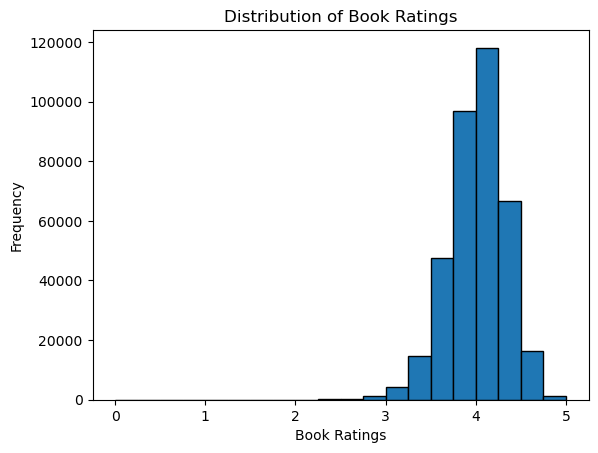

In [45]:
import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=20, edgecolor='black')

plt.xlabel('Book Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings')
plt.show()


### Top 10 genres based on the number if books in each genre

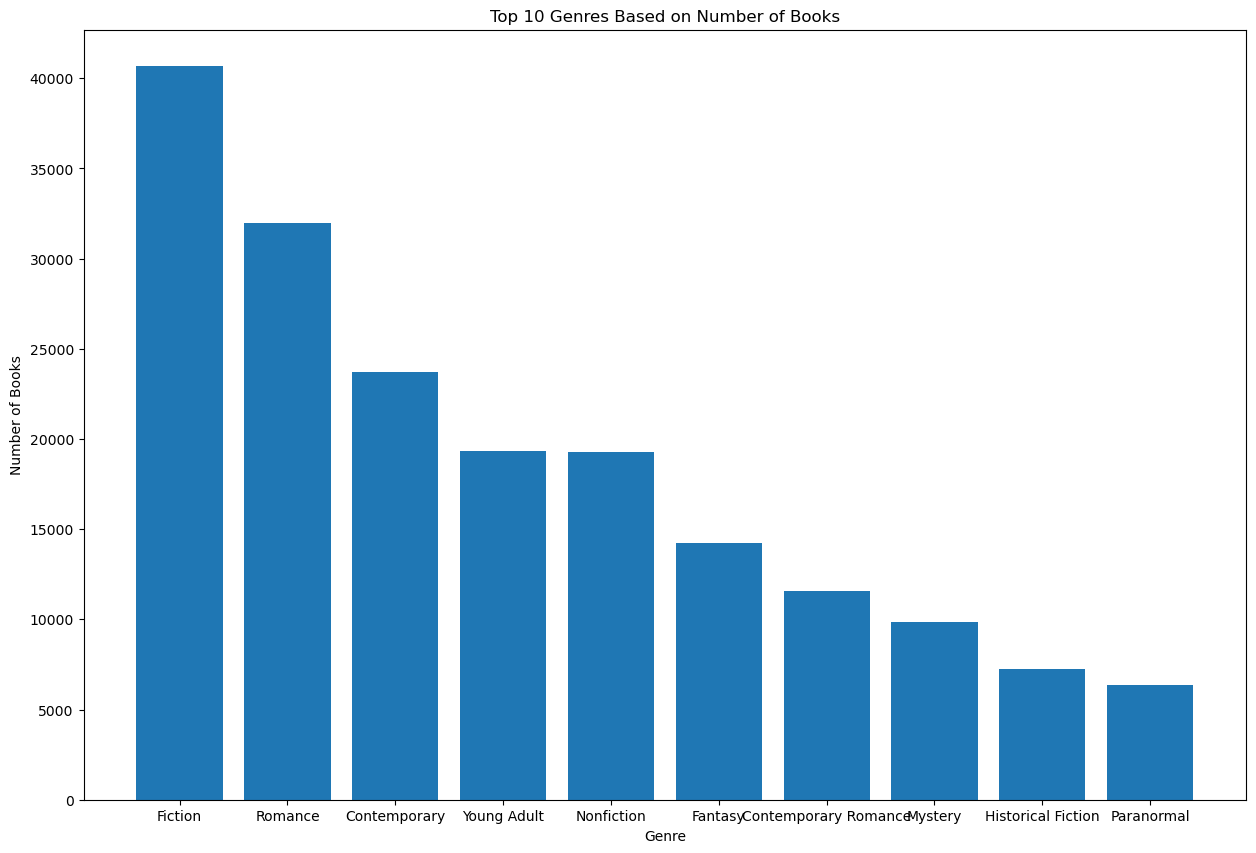

In [46]:
import matplotlib.pyplot as plt

genre_counts = df['genre'].value_counts()

top_genres = genre_counts.head(10)
fig, ax = plt.subplots(figsize =(15, 10))
plt.bar(top_genres.index, top_genres.values)

plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Top 10 Genres Based on Number of Books')

plt.show()


### Era of Books Read By A User

In [47]:
def user_book_era(user):
    userrows=df.loc[df["USERID"]==user]
    r=userrows.iloc[:, 3].values
    t=userrows.iloc[:,1].values
    
    years=[]
    for i in r:
        years.append(int(i))
    
    titles=[]
    for i in t:
        titles.append(i)
    
    titleyears={}
    for key in titles:
        for value in years:
            titleyears[key] = value
            years.remove(value)
            break
    
    sortedtitles=sorted(titleyears.items(), key=lambda x:x[1])
    titleyears=dict(sortedtitles)
    
    dates=list(titleyears.values())
    titles=list(titleyears.keys())
    
    stddev=stats.stdev(dates)
    era=[round(dates[0]-(2*stddev)),round(dates[-1]+(2*stddev))]
    return era

In [48]:
user_book_era(145682680)

[1767, 2088]

### Distribution of User’s Preferred Genres


In [49]:
import squarify
def usergenres(user):
    userrows=df.loc[df["USERID"]==user]
    g=userrows.iloc[:,4].values
    
    count_dict = {}
    for item in g:
        if item in count_dict:
            count_dict[item] += 1
        else:
            count_dict[item] = 1
    
    genre=list(count_dict.keys())
    count=list(count_dict.values())
    
    squarify.plot(sizes=count, label=genre, alpha=.8 )
    plt.title("Distribution of Genres of User's Read Books")


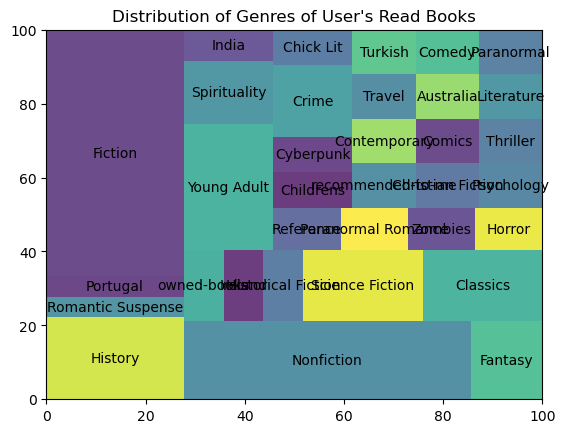

In [50]:
usergenres(145682680)


### Distribution of Page Count of User’s Read Books


In [51]:
def pagecountdist(user):
    userrows=df.loc[df["USERID"]==user]
    p=userrows.iloc[:,5].values
    
    for i in p:
        if i.isnumeric()==False:
            p.remove(i)
    
    pages=[]
    for i in p:
        pages.append(int(i))
        
    pages=pd.Series(pages)
    
    ax = sns.histplot(pages, color='#9d94ba', bins=10, kde=False)
    ax.set(title='Distribution of Page Count of User Books')
    plt.axvline(pages.mean(), color="purple", label="mean")
    plt.text(x = pages.mean()+3, y = max([h.get_height() for h in ax.patches]), s = "mean: {:.0f}".format(pages.mean()), color = "purple") 



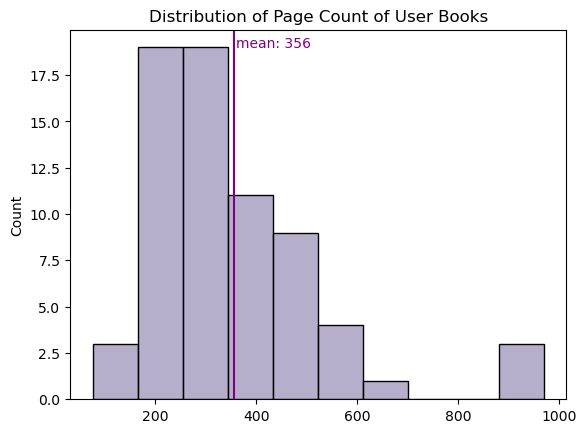

In [52]:
pagecountdist(1045)

### Top Authors by Rating

In [53]:
author_counts = df["author"].value_counts()
top_authors = author_counts[:10]
print(top_authors)

avg_ratings_by_author = df.groupby("author")["rating"].mean()
top_authors_by_rating = avg_ratings_by_author.sort_values(ascending=False)[:10]
print(top_authors_by_rating)

James Patterson    742
Stephenie Meyer    571
Margaret Atwood    561
Colleen Hoover     561
J.K. Rowling       558
Alexa Riley        551
Stephen King       539
Agatha Christie    528
Rina Kent          518
Cassandra Clare    511
Name: author, dtype: int64
author
June Pitman-Hayes       5.0
Alena Bruzas            5.0
E.A.M. Jakab            5.0
Kayla McGrath           5.0
Wadzanai Mufunde        5.0
Ivy Walker              5.0
Bess Lewis              5.0
Clancy Tucker           5.0
Sami Ellis              5.0
Lyra  Blizzard Logan    5.0
Name: rating, dtype: float64


### Top Countries by Rating

In [54]:
country_counts = df["Country"].value_counts()
top_countries = country_counts[:10]
print(top_countries)

avg_ratings_by_country = df.groupby("Country")["rating"].mean()
top_countries_by_rating = avg_ratings_by_country.sort_values(ascending=False)[:10]
print(top_countries_by_rating)

ll    38168
US    35743
GB    30560
CA    29882
AU    29152
NZ    25726
SG    24865
IE    23924
DO    21656
TT    19646
Name: Country, dtype: int64
Country
LC    4.050084
BB    4.045010
GY    4.039049
TT    4.035964
SC    4.031898
AU    4.031484
NZ    4.023643
MT    4.011640
GB    4.004563
DO    4.004019
Name: rating, dtype: float64


### Most Reviewed Books

In [55]:
most_rated_books = df.sort_values(by="num_of_rating", ascending=False)[:10]
print(most_rated_books[["title", "author", "num_of_rating", "num_of_review"]])

most_reviewed_books = df.sort_values(by="num_of_review", ascending=False)[:10]
print(most_reviewed_books[["title", "author", "num_of_rating", "num_of_review"]])

                                                    title        author  \
184269                                     Kiss Me, Daddy    Quinn Ward   
336354  Whatever Happened to the Hall of Fame? Basebal...    Bill James   
279377                                       Why Am I Me?   Paige Britt   
68503                                La lección de August  R.J. Palacio   
149637                Immoveable Feast: A Paris Christmas   John Baxter   
336446  God Hates Astronauts, Vol. 1: The Head That Wo...   Ryan Browne   
171193                                       Tanners Dell  S.E. England   
292084                                   His Sweet Reward   Alexa Riley   
124123                                   Forerunner Foray  Andre Norton   
124124                                   Forerunner Foray  Andre Norton   

        num_of_rating  num_of_review  
184269            999            123  
336354            999             32  
279377            999            260  
68503             